<a href="https://colab.research.google.com/github/VismayaS25/CognoRise-InfoTech/blob/main/Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

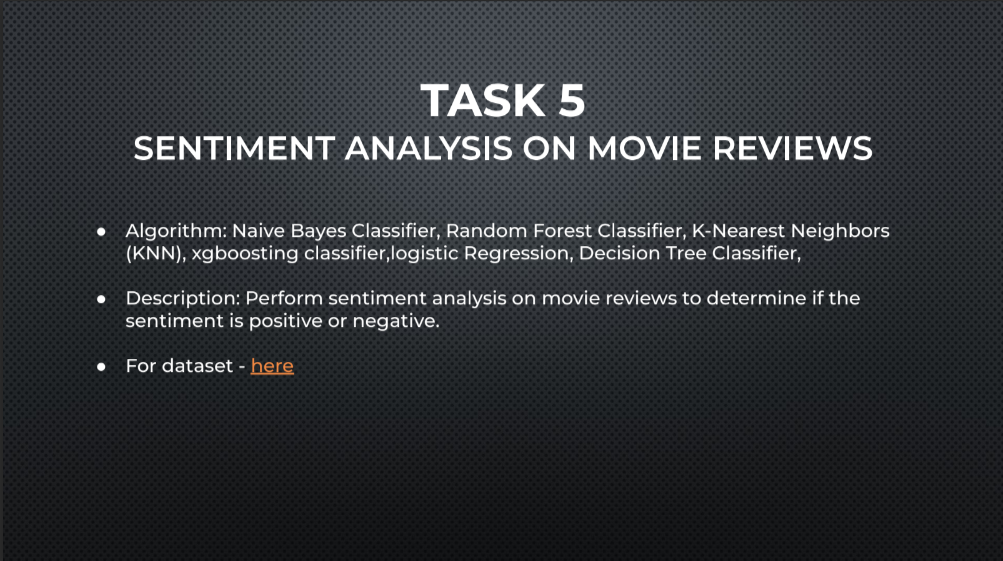

# *Importing Libraries and Packages*


In [ ]:
import pandas as pd
import numpy as np
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/CognoRise InfoTech/IMDB Dataset.csv',nrows=2500)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
2495,Another great movie by Costa-Gavras. It's a gr...,negative
2496,Though structured totally different from the b...,positive
2497,Handsome and dashing British airline pilot Geo...,positive
2498,This film breeches the fine line between satir...,negative


In [ ]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
df.dtypes

review       object
sentiment    object
dtype: object

In [ ]:
# To check balance or not


sentiment_count=df['sentiment'].value_counts()
print(sentiment_count)

sentiment
positive    1266
negative    1234
Name: count, dtype: int64


# *Image presentation*

[Text(0.5, 1.0, 'Sentiment Types'), Text(0, 0.5, 'frequency')]

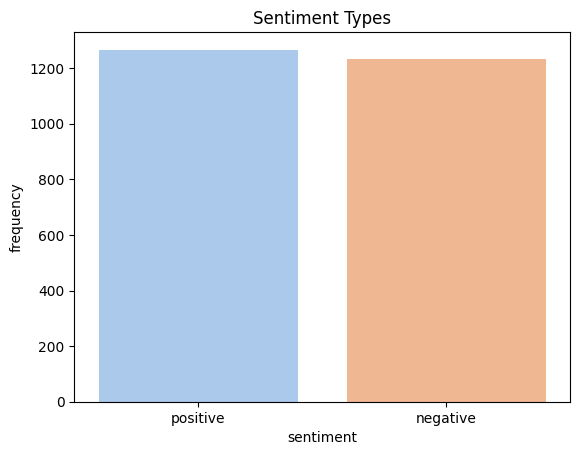

In [ ]:
sns.countplot(x='sentiment',data=df,palette="pastel").set(title='Sentiment Types',ylabel='frequency')

# *Mapping*

In [ ]:
le=LabelEncoder()
df['sentiment']=le.fit_transform(df['sentiment'])
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
2495,Another great movie by Costa-Gavras. It's a gr...,0
2496,Though structured totally different from the b...,1
2497,Handsome and dashing British airline pilot Geo...,1
2498,This film breeches the fine line between satir...,0


In [ ]:
Review=df.review
Review

0       One of the other reviewers has mentioned that ...
1       A wonderful little production. <br /><br />The...
2       I thought this was a wonderful way to spend ti...
3       Basically there's a family where a little boy ...
4       Petter Mattei's "Love in the Time of Money" is...
                              ...                        
2495    Another great movie by Costa-Gavras. It's a gr...
2496    Though structured totally different from the b...
2497    Handsome and dashing British airline pilot Geo...
2498    This film breeches the fine line between satir...
2499    Mardi Gras: Made in China provides a wonderful...
Name: review, Length: 2500, dtype: object

**Remove special characters**

In [ ]:
Review=Review.str.replace('[^a-zA-Z0-9]+',' ')
Review

0       One of the other reviewers has mentioned that ...
1       A wonderful little production. <br /><br />The...
2       I thought this was a wonderful way to spend ti...
3       Basically there's a family where a little boy ...
4       Petter Mattei's "Love in the Time of Money" is...
                              ...                        
2495    Another great movie by Costa-Gavras. It's a gr...
2496    Though structured totally different from the b...
2497    Handsome and dashing British airline pilot Geo...
2498    This film breeches the fine line between satir...
2499    Mardi Gras: Made in China provides a wonderful...
Name: review, Length: 2500, dtype: object

# *Stemming*

In [ ]:
stemmer=SnowballStemmer('english')
tk=TweetTokenizer()

In [ ]:
Review=Review.apply(lambda x:[stemmer.stem(token.lower())for token in tk.tokenize(x)]).apply(lambda token:' '.join(token))
Review

0       one of the other review has mention that after...
1       a wonder littl product . < br / > < br / > the...
2       i thought this was a wonder way to spend time ...
3       basic there a famili where a littl boy ( jake ...
4       petter mattei " love in the time of money " is...
                              ...                        
2495    anoth great movi by costa-gavra . it a great p...
2496    though structur total differ from the book by ...
2497    handsom and dash british airlin pilot georg ta...
2498    this film breech the fine line between satir a...
2499    mardi gras : made in china provid a wonder , i...
Name: review, Length: 2500, dtype: object

Removal of stopwords

In [ ]:
nltk.download('stopwords')
sw=stopwords.words('english')
sw

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
Review=Review.apply(lambda x:[token for token in tk.tokenize(x)if token not in sw]).apply(lambda token:' '.join(token))
Review

0       one review mention watch 1 oz episod hook . ri...
1       wonder littl product . < br / > < br / > film ...
2       thought wonder way spend time hot summer weeke...
3       basic famili littl boy ( jake ) think zombi cl...
4       petter mattei " love time money " visual stun ...
                              ...                        
2495    anoth great movi costa-gavra . great present s...
2496    though structur total differ book tim krabbé w...
2497    handsom dash british airlin pilot georg taylor...
2498    film breech fine line satir silli . bridg syst...
2499    mardi gras : made china provid wonder , intric...
Name: review, Length: 2500, dtype: object

In [ ]:
# to remove character len<2
Review=Review.apply(lambda x:[token for token in tk.tokenize(x)if len(token)>1]).apply(lambda token:' '.join(token))
Review

0       one review mention watch oz episod hook right ...
1       wonder littl product br br film techniqu veri ...
2       thought wonder way spend time hot summer weeke...
3       basic famili littl boy jake think zombi closet...
4       petter mattei love time money visual stun film...
                              ...                        
2495    anoth great movi costa-gavra great present sit...
2496    though structur total differ book tim krabbé w...
2497    handsom dash british airlin pilot georg taylor...
2498    film breech fine line satir silli bridg system...
2499    mardi gras made china provid wonder intric con...
Name: review, Length: 2500, dtype: object

# *Vectorization*

In [ ]:
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(Review)
print(X)

  (0, 15775)	0.05067448676119587
  (0, 4428)	0.0824964238999093
  (0, 17771)	0.050356645241588734
  (0, 18746)	0.043893659386081446
  (0, 18169)	0.0761376069917317
  (0, 3656)	0.06750923009257415
  (0, 1755)	0.0409183491484175
  (0, 10911)	0.040532330106789485
  (0, 6061)	0.047896769824079956
  (0, 15921)	0.0609039077715534
  (0, 16726)	0.05867509451601736
  (0, 9816)	0.045916713964218245
  (0, 2012)	0.08562481519719803
  (0, 18019)	0.03819958157117562
  (0, 3430)	0.0552997532223549
  (0, 11205)	0.05678539557282123
  (0, 10712)	0.06115041318439653
  (0, 19109)	0.027440288621712126
  (0, 7142)	0.04923237050065416
  (0, 12465)	0.053833576265320746
  (0, 9592)	0.04237228004783506
  (0, 8819)	0.185181955512202
  (0, 12019)	0.10121935465525855
  (0, 16178)	0.07255650702067
  (0, 10278)	0.09461976246130213
  :	:
  (2499, 11981)	0.04434152343491674
  (2499, 8427)	0.05311483013997709
  (2499, 18826)	0.06555639265435935
  (2499, 6055)	0.04837065676390841
  (2499, 10626)	0.05864003061828145
  (2

In [ ]:
# to find the unique values
vectorizer.get_feature_names_out()

array(['00', '000', '002', ..., 'ís', 'ísnt', 'île'], dtype=object)

In [ ]:
# convert to array

X=X.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X.shape

(2500, 19719)

In [ ]:
y=df.iloc[:,-1]
y

0       1
1       1
2       1
3       0
4       1
       ..
2495    0
2496    1
2497    1
2498    0
2499    1
Name: sentiment, Length: 2500, dtype: int64

# *Train Test Split*

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=9)

# *Model Creation*

In [ ]:
knn=KNeighborsClassifier()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
xgb=XGBClassifier()

In [ ]:
models=[knn,gnb,dtc,rfc,xgb]
algo_accuracy = []
for model in models:
  print('****************************',model,'***********************************')
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print('Accuracy score',accuracy_score(y_test,y_pred))
  algo_accuracy.append(accuracy_score(y_test,y_pred)*100)

**************************** KNeighborsClassifier() ***********************************
              precision    recall  f1-score   support

           0       0.61      0.83      0.70       351
           1       0.78      0.53      0.63       399

    accuracy                           0.67       750
   macro avg       0.70      0.68      0.67       750
weighted avg       0.70      0.67      0.67       750

Accuracy score 0.672
**************************** GaussianNB() ***********************************
              precision    recall  f1-score   support

           0       0.57      0.60      0.58       351
           1       0.63      0.60      0.62       399

    accuracy                           0.60       750
   macro avg       0.60      0.60      0.60       750
weighted avg       0.60      0.60      0.60       750

Accuracy score 0.6013333333333334
**************************** DecisionTreeClassifier() ***********************************
              precision    recall  

In [ ]:
print(algo_accuracy)

[67.2, 60.13333333333334, 70.39999999999999, 83.6, 82.39999999999999]


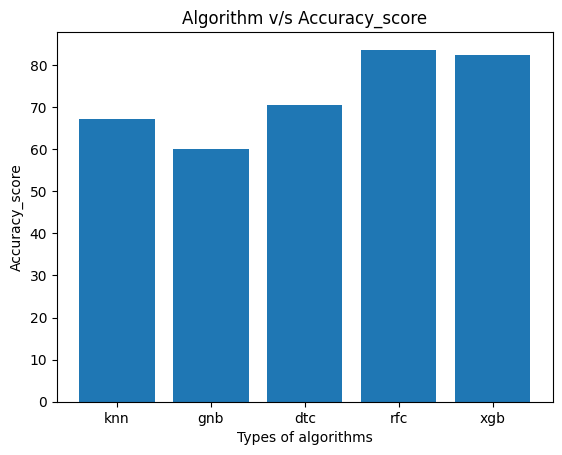

In [ ]:
algorithm=['knn','gnb','dtc','rfc','xgb']
plt.bar(algorithm,algo_accuracy)
plt.plot()
plt.xlabel('Types of algorithms')
plt.ylabel('Accuracy_score')
plt.title('Algorithm v/s Accuracy_score')
plt.show()

# *OverSampling*

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=39)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [ ]:
rfc_classifier = RandomForestClassifier(n_estimators=150, min_samples_split=10, min_samples_leaf=2, max_depth=None, bootstrap=False)
rfc_classifier.fit(X_resampled, y_resampled)
rfc_y_pred = rfc_classifier.predict(X_test)
print(classification_report(y_test,rfc_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       351
           1       0.88      0.84      0.86       399

    accuracy                           0.85       750
   macro avg       0.85      0.85      0.85       750
weighted avg       0.85      0.85      0.85       750



# *UnderSampling*

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=49)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_classifier = RandomForestClassifier(n_estimators=150, min_samples_split=10, min_samples_leaf=2, max_depth=None, bootstrap=False)
rfc_classifier.fit(X_resampled, y_resampled)
rfc1_y_pred = rfc_classifier.predict(X_test)
print(classification_report(y_test,rfc1_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       351
           1       0.87      0.86      0.86       399

    accuracy                           0.86       750
   macro avg       0.86      0.86      0.86       750
weighted avg       0.86      0.86      0.86       750



# *HyperParameter Tuning*

In [ ]:
params={'n_estimators':[25,50,100,150],
    'max_depth': [None, 10, 20, 30],
    'bootstrap': [True, False]
}
rfc1=RandomizedSearchCV(rfc_classifier,params)
model_random = rfc1.fit(X_train,y_train)

In [ ]:
print(rfc1.best_estimator_)

RandomForestClassifier(bootstrap=False, min_samples_leaf=2,
                       min_samples_split=10)


In [ ]:
rfc_new1=RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=2,
                       min_samples_split=10)
rfc_new1.fit(X_train,y_train)
rf_yy_pred=rfc_new1.predict(X_test)
print(classification_report(y_test,rf_yy_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       351
           1       0.86      0.83      0.84       399

    accuracy                           0.84       750
   macro avg       0.84      0.84      0.84       750
weighted avg       0.84      0.84      0.84       750



In [ ]:
print('Accuracy score',accuracy_score(y_test,rf_yy_pred)*100)

Accuracy score 83.6


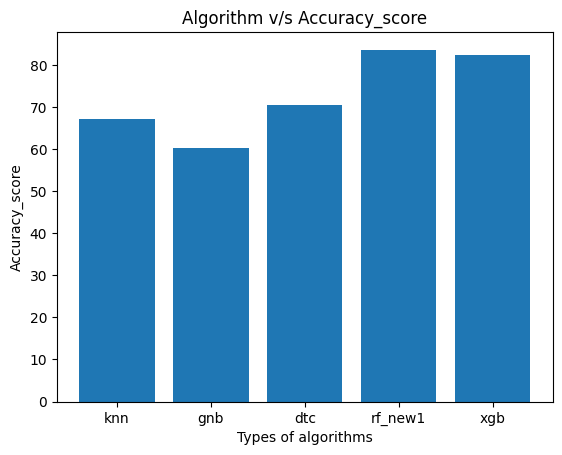

In [ ]:
algorithm=['knn','gnb','dtc','rf_new1','xgb']
plt.bar(algorithm,algo_accuracy)
plt.plot()
plt.xlabel('Types of algorithms')
plt.ylabel('Accuracy_score')
plt.title('Algorithm v/s Accuracy_score')
plt.show()